# International-Debt-Statistics

GitHub Repository: https://github.com/skhiearth/International-Debt-Statistics

Analysing about international debt using data from International Monetary Fund. Partly inspired by the 'Analyze International Debt Statistics' project on DataCamp by Sayak Paul. 

The data used is provided by [International Monetary Fund](https://www.imf.org/external/datamapper/CG_DEBT_GDP@GDD/CHN/FRA/DEU/ITA/JPN/GBR/USA). It contains debt statistics for several countries across the globe as recorded from 1950 to 2018.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the XLS
df = pd.read_csv('Dataset/imf-debt.csv', na_values = 'no data')
df.head(3)

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.247261,7.709434,7.512624,6.769370,6.914434,8.700291,9.144177,7.823194,7.452149,6.894410
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.670180,57.710251,59.399812,62.119953,65.529876,70.025578,72.670025,72.375941,70.091619,68.044939


In [2]:
df.drop(df.index[0], inplace = True)
df.head(2)

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.247261,7.709434,7.512624,6.769370,6.914434,8.700291,9.144177,7.823194,7.452149,6.894410
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.670180,57.710251,59.399812,62.119953,65.529876,70.025578,72.670025,72.375941,70.091619,68.044939


In [3]:
# Converting dataframe from wide to tall
df2 = df.reset_index()
cols = list(df2.columns[2:])
time_series = pd.melt(df2, id_vars='Central Government Debt (Percent of GDP)', value_vars=cols)
time_series.tail()

,Central Government Debt (Percent of GDP),variable,value
12139,Yemen,2018,64.752349
12140,Zambia,2018,78.109917
12141,Zimbabwe,2018,37.057447
12142,NaN,2018,NaN
12143,"©IMF, 2019",2018,NaN


In [4]:
# Rename columns
time_series.rename(columns = {'Central Government Debt (Percent of GDP)':'Debt'}, inplace = True) 

# Dropping redunant rows
filtered_df = time_series[time_series['Debt'].notnull()]
filtered_df = filtered_df[:-1]

filter = ['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990',
         '1995', '2000', '2005', '2010', '2015', '2018'] 

filtered_df = filtered_df[filtered_df['variable'].isin(filter)] 

print(filtered_df.shape)
filtered_df.tail()

(2624, 3)


,Debt,variable,value
12137,Vietnam,2018,NaN
12138,West Bank and Gaza,2018,36.621482
12139,Yemen,2018,64.752349
12140,Zambia,2018,78.109917
12141,Zimbabwe,2018,37.057447


In [5]:
# Selecting countries for detailed analysis
India = filtered_df[filtered_df['Debt']=='India']
USA = filtered_df[filtered_df['Debt']=='United States']
Switzerland = filtered_df[filtered_df['Debt']=='Switzerland']
Germany = filtered_df[filtered_df['Debt']=='Germany']
UK = filtered_df[filtered_df['Debt']=='United Kingdom']
France = filtered_df[filtered_df['Debt']=='France']

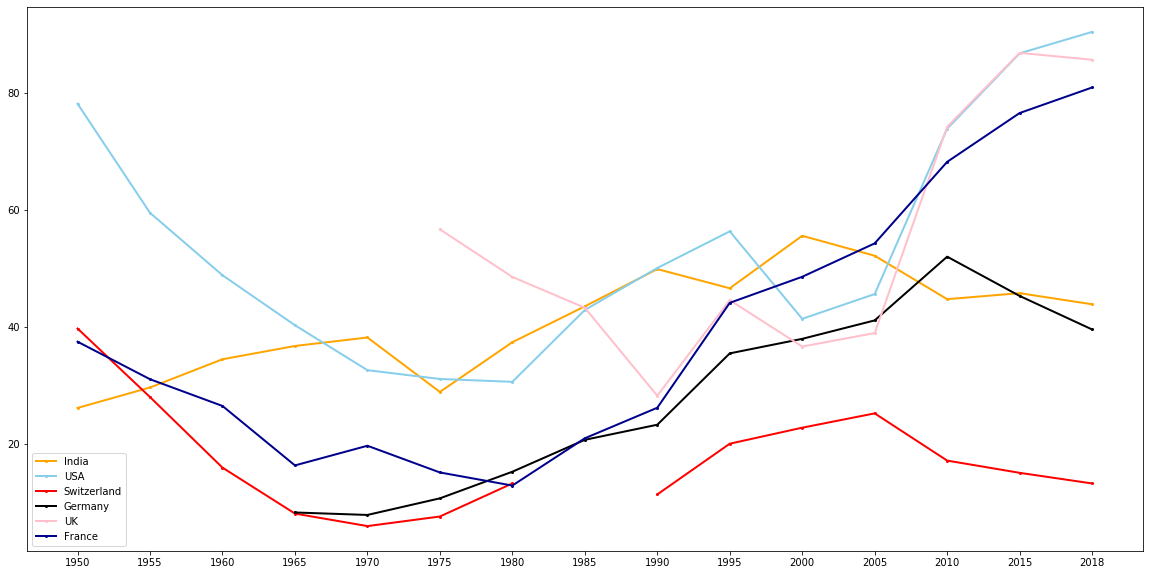

In [6]:
plt.figure(figsize=(20,10))

# India
plt.plot('variable', 'value', data=India, marker='o',
         markersize=2, color='orange', linewidth=2, label='India')

# United States
plt.plot('variable', 'value', data=USA, marker='o',
         markersize=2, color='skyblue', linewidth=2, label='USA')

# Switzerland
plt.plot('variable', 'value', data=Switzerland, marker='o',
         markersize=2, color='red', linewidth=2, label='Switzerland')

# Germany
plt.plot('variable', 'value', data=Germany, marker='o',
         markersize=2, color='black', linewidth=2, label='Germany')

# United Kingdom
plt.plot('variable', 'value', data=UK, marker='o',
         markersize=2, color='pink', linewidth=2, label='UK')

# France
plt.plot('variable', 'value', data=France, marker='o',
         markersize=2, color='darkblue', linewidth=2, label='France')

plt.legend()